## 1. Importowanie danych

In [1]:
from utils.datahandler import DataHandler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
datahandler = DataHandler()

datahandler.load_data()

datahandler.prepare_data()
df = datahandler.get_data()
X_train, X_test, y_train, y_test = datahandler.get_data_split()

In [3]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [4]:
j = 200 #Rekords o tym indeksie jest w późniejszej części kodu analizowany

X_test.iloc[j, :]

age                               66.00
hypertension                       0.00
heart_disease                      0.00
avg_glucose_level                 74.88
bmi                               32.60
stroke                             0.00
gender_Female                      1.00
gender_Male                        0.00
gender_Other                       0.00
ever_married_No                    0.00
ever_married_Yes                   1.00
work_type_Govt_job                 0.00
work_type_Never_worked             0.00
work_type_Private                  0.00
work_type_Self-employed            1.00
work_type_children                 0.00
Residence_type_Rural               1.00
Residence_type_Urban               0.00
smoking_status_Unknown             0.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        1.00
Name: 4678, dtype: float64

## 2. RandomForest Classifier

### 2.1. Lime

In [5]:
from lime import lime_tabular

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [7]:
print(f"F1 Score {f1_score(y_test, y_pred)}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))

F1 Score 1.0
Accuracy 1.0
[[850   0]
 [  0 172]]


In [8]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values, 
                                              feature_names=X_train.columns.values, 
                                              verbose=True,
                                              mode="regression")

In [9]:
exp = explainer.explain_instance(data_row=X_test.values[j], 
                                 predict_fn=rf.predict)

exp.show_in_notebook(show_table=True)

c:\Users\Stasiek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept -0.235495506792946
Prediction_local [0.2501197]
Right: 0


### 2.2. SHAP

In [10]:
import shap

In [11]:
shap.initjs()

explainer = shap.Explainer(rf.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 1023it [05:13,  3.20it/s]                          


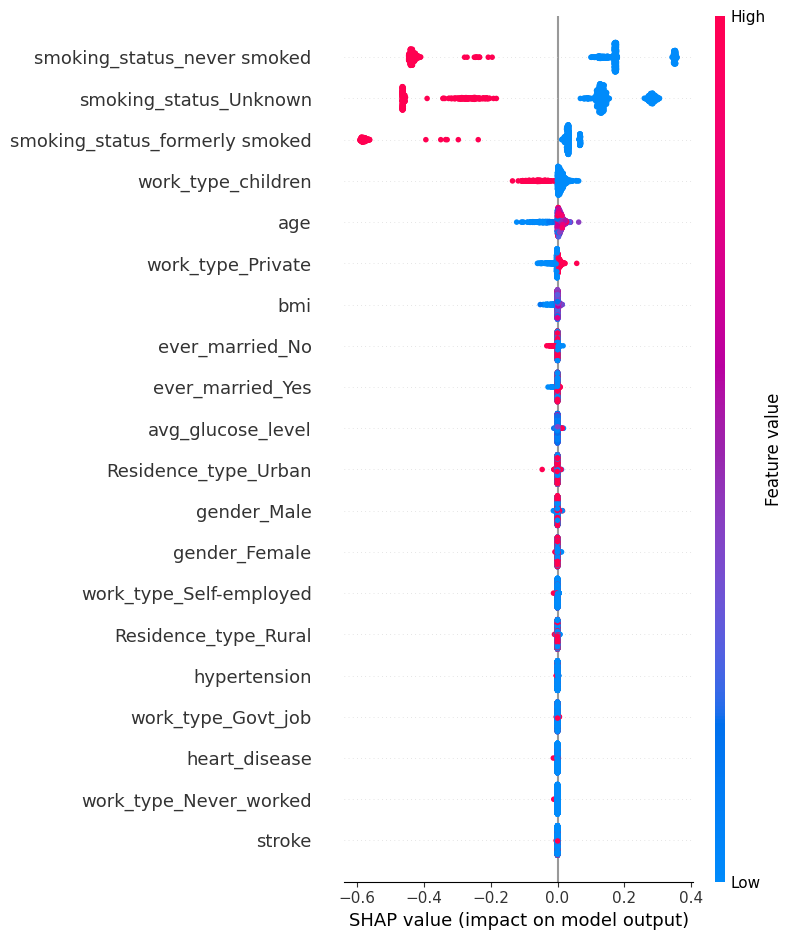

In [13]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [14]:
shap.plots.force(shap_values.base_values[j], 
                shap_values.values[j], 
                shap_values.data[j], 
                feature_names=X_test.columns)

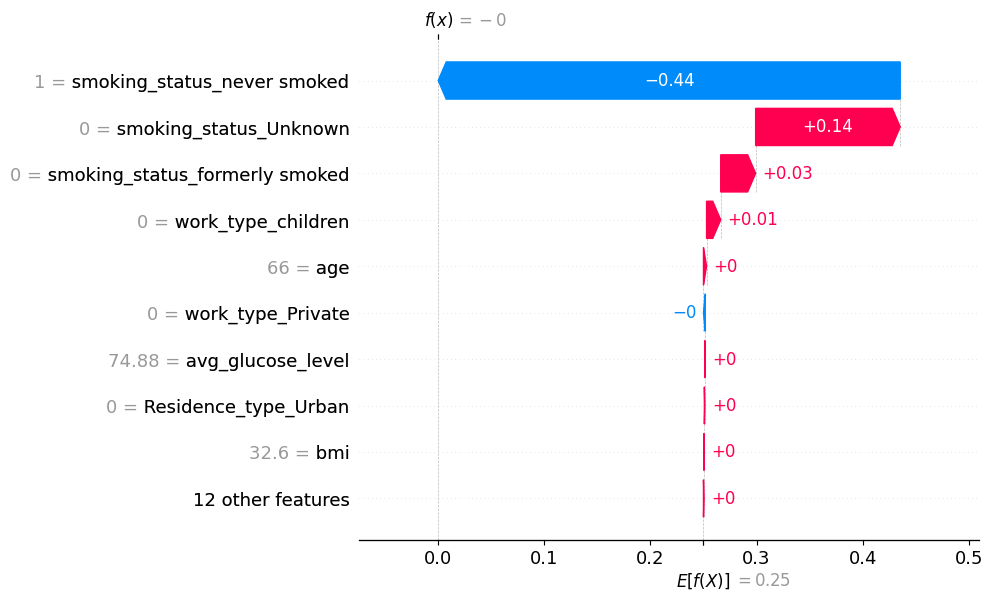

In [15]:
shap.plots.waterfall(shap_values[j])

### 2.3. Partial Dependance Plot

In [16]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [17]:
feature = 'age'

pdp_lines = partial_dependence(estimator=rf,
                               X=X_test,
                               features=[feature],
                               percentiles=(0, 1),
                               kind='average')

In [18]:
pdp_lines

{'average': array([[0.13899217, 0.13899217, 0.13899217, 0.13899217, 0.13899217,
         0.13899217, 0.13899217, 0.13899217, 0.13899217, 0.13899217,
         0.13899217, 0.13899217, 0.13899217, 0.13899217, 0.13899217,
         0.13899217, 0.13899217, 0.13899217, 0.13899217, 0.13899217,
         0.13899217, 0.13899217, 0.13901174, 0.13917808, 0.13893346,
         0.13885519, 0.13883562, 0.13678082, 0.13666341, 0.14015656,
         0.15295499, 0.15571429, 0.16157534, 0.17133072, 0.17445205,
         0.17396282, 0.17391389, 0.17712329, 0.17561644, 0.17705479,
         0.17701566, 0.17573386, 0.17601761, 0.176409  , 0.1769863 ,
         0.17704501, 0.17450098, 0.17195695, 0.17189824, 0.1722407 ,
         0.17235812, 0.17262231, 0.171409  , 0.17133072, 0.17177104,
         0.17234834, 0.17278865, 0.17272994, 0.17300391, 0.17261252,
         0.17327789, 0.17278865, 0.17345401, 0.17367906, 0.17306262,
         0.17287671, 0.17236791, 0.17292564, 0.17217221, 0.17179061,
         0.16960861, 0.

In [19]:
print(len(pdp_lines['average'][0]))
print(np.shape(pdp_lines['values']))
print(np.shape(pdp_lines['average']))

96
(1, 96)
(1, 96)


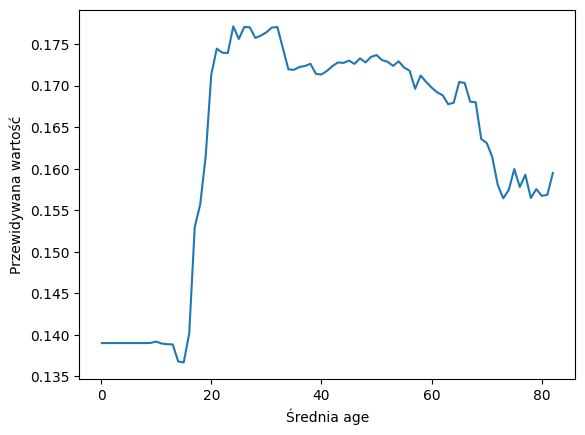

In [20]:
plt.plot(pdp_lines['values'][0], pdp_lines['average'][0])

plt.ylabel("Przewidywana wartość")
plt.xlabel(f"Średnia {feature}")

plt.show()

2D PDP

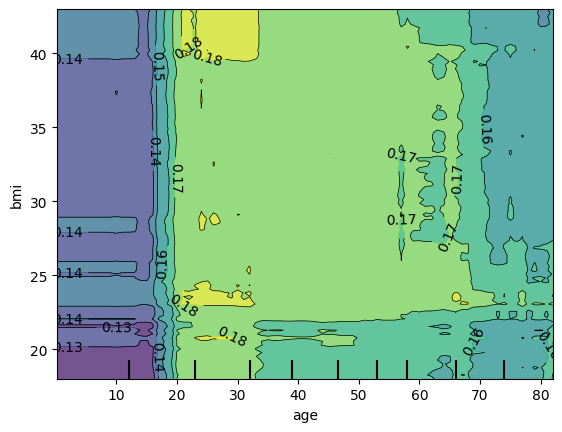

In [21]:
features = [('age', 'bmi')]

PartialDependenceDisplay.from_estimator(rf, X_test, features)

### 2.4. Individual Conditional Expectation

In [22]:
from sklearn.inspection import partial_dependence

In [23]:
pdp_lines = partial_dependence(estimator=rf,
                               X=X_test,
                               features=[feature],
                               percentiles=(0, 1),
                               kind='both')

In [24]:
pdp_lines['individual'][0]

array([[0.04, 0.04, 0.04, ..., 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.05, 0.05, 0.06],
       ...,
       [0.02, 0.02, 0.02, ..., 0.01, 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [25]:
#Wyśrodkowanie lini

for i in range(len(pdp_lines['individual'][0])):
    pdp_start = pdp_lines['individual'][0][i][0]
    pdp_lines['individual'][0][i] = pdp_lines['individual'][0][i] - pdp_start

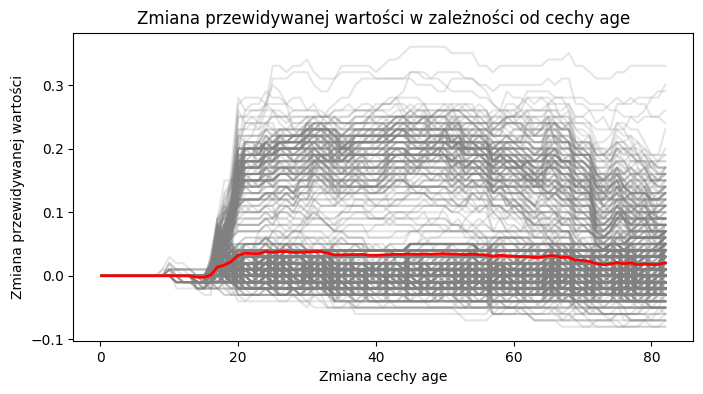

In [26]:
plt.figure(figsize=(8, 4))

for i in range(len(pdp_lines['individual'][0])):
    plt.plot(pdp_lines['values'][0],
             pdp_lines['individual'][0][i],
             color='gray',
             alpha=0.2)
    
pdp_avg = pdp_lines['average'][0] - pdp_lines['average'][0][0]
plt.plot(pdp_lines['values'][0], pdp_avg, linewidth=2, color='red')

plt.title("Zmiana przewidywanej wartości w zależności od cechy age")
plt.ylabel("Zmiana przewidywanej wartości")
plt.xlabel("Zmiana cechy age")

plt.show()